## Exploring Lorenz equations numerically

The system is well described in, e.g., https://en.wikipedia.org/wiki/Lorenz_system

The notebook uses the following parameter values:

$$
\sigma = 10 \,, \ \beta = ⁠8/3\,, \ \rho = 28 \,.
$$

In the homework assignment, you will use other parameter values.

In [36]:
def l63rhs(xin, tin, pars):
  return l63rhs_ode(tin, xin, pars)

def l63rhs_ode(tin, xin, pars):
  frhs = xin*0.0
  beta, sigma, rho = pars
  x, y, z = xin
  frhs[0] = sigma * (y - x)
  frhs[1] = x * (rho - z) - y
  frhs[2] = x * y - beta * z
  return frhs

def l63rhs_df(xin,tin,pars):
  df = np.zeros((3,3))
  beta, sigma, rho = pars
  x, y, z = xin
  df[0,0] = -sigma; df[0,1] = sigma;
  df[1,0] = rho - z; df[1,1] = -1.0; df[1,2] = -x;
  df[2,0] = y; df[2,1] = x; df[2,2] = -beta;
  return df
  
def l63rhslin(zin, tin, pars):
  '''
  Here zin must be 12 dimensionsal: xin, followed by rows of mlin
  '''
  beta, sigma, rho = pars
  ndim = 3
  xin = zin[:ndim]
  mlin = np.reshape(zin[ndim:],(ndim,ndim),'F')

  df = l63rhs_df(xin, tin, pars)
  xin = l63rhs(xin, tin, pars)
  mlin = np.dot(df, mlin)
  
  frhs = np.concatenate((xin, np.reshape(mlin,ndim**2,'F')))
  return frhs

def l63rhslin_ode(tin, xin, pars):
  return l63rhslin(xin, tin, pars)

def l63rhslinvec(zin, tin, pars):
  '''
  Here zin must be 6 dimensionsal: xin, followed by zlin
  '''
  beta, sigma, rho = pars
  ndim = 3
  xin = zin[:ndim]
  zlin = zin[ndim:]

  df = l63rhs_df(xin, tin, pars)
  xin = l63rhs(xin, tin, pars)
  zlin = np.dot(df, zlin)
  
  frhs = np.concatenate((xin, zlin))
  return frhs

def l63rhslinvec_ode(tin, xin, pars):
  return l63rhslinvec(xin, tin, pars)

In [37]:
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)

### Nearby initial conditions

First, find an initial condition on what is called the "Lorenz attractor" and another one very close to it, and plot the solutions and also distance between them.

In [41]:
ndim = 3

np.random.seed(657183)
xrand = np.random.rand(ndim)
ttrans = np.linspace(0,100,1000)
xtrans = scp.integrate.odeint(l63rhs, xrand, ttrans, (pars,))

t = np.linspace(0,50,100000)
xattr = xtrans[-1,:]

xinit1 = xattr
xtraj1 = scp.integrate.odeint(l63rhs, xinit1, t, (pars,))

# xinit2 = np.random.rand(ndim) # xattr + np.random.rand(ndim)*1.0e-8
xinit2 = xinit1 + np.random.rand(ndim)*1.0e-8
xtraj2 = scp.integrate.odeint(l63rhs, xinit2, t, (pars,))

trajdiff = np.array([np.linalg.norm(v) for v in xtraj1-xtraj2])

In [40]:
%matplotlib inline

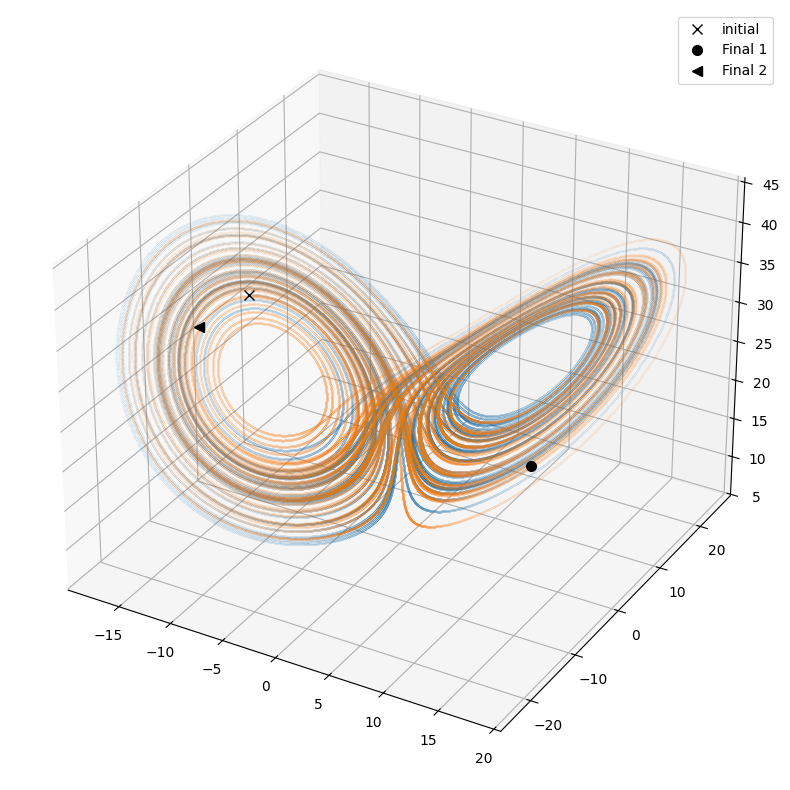

In [42]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(xtraj1[:,0], xtraj1[:,1], xtraj1[:,2], '.', ms=0.1)
ax.plot(xtraj2[:,0], xtraj2[:,1], xtraj2[:,2], '.', ms=0.1)

ax.plot(xtraj1[0,0], xtraj1[0,1], xtraj1[0,2], 'xk', ms=7, label="initial")

ax.plot(xtraj1[-1,0], xtraj1[-1,1], xtraj1[-1,2], 'ok', ms=7, label="Final 1")
ax.plot(xtraj2[-1,0], xtraj2[-1,1], xtraj2[-1,2], '<k', ms=7, label="Final 2")

plt.legend()
plt.tight_layout()

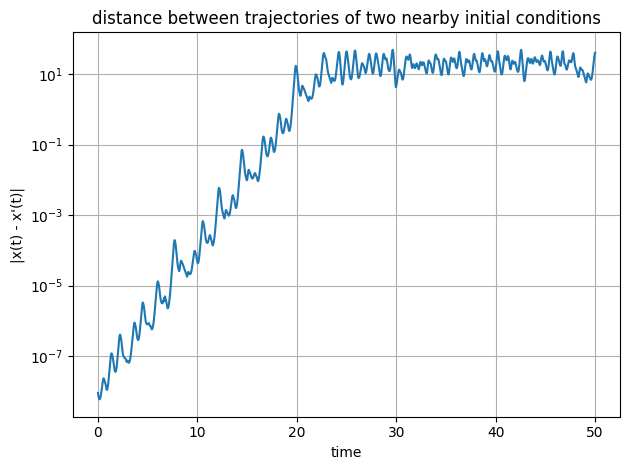

In [43]:
plt.semilogy(t, trajdiff)
plt.xlabel('time')
plt.ylabel("|x(t) - x'(t)|")
plt.title("distance between trajectories of two nearby initial conditions")
plt.grid()
plt.tight_layout()

### Random initial conditions

Now, we choose two random initial conditions on the Lorenz attractor and plot the solutions as well as the distance between them.


In [48]:
ndim = 3

np.random.seed(51976)
xrand = np.random.rand(ndim)
ttrans = np.linspace(0,100,1000)
xtrans = scp.integrate.odeint(l63rhs, xrand, ttrans, (pars,))

t = np.linspace(0,50,100000)

xinit1 = xtrans[-1,:]
xtraj1 = scp.integrate.odeint(l63rhs, xinit1, t, (pars,))

xinit2 = xtrans[-100,:]
xtraj2 = scp.integrate.odeint(l63rhs, xinit2, t, (pars,))

trajdiff = np.array([np.linalg.norm(v) for v in xtraj1-xtraj2])

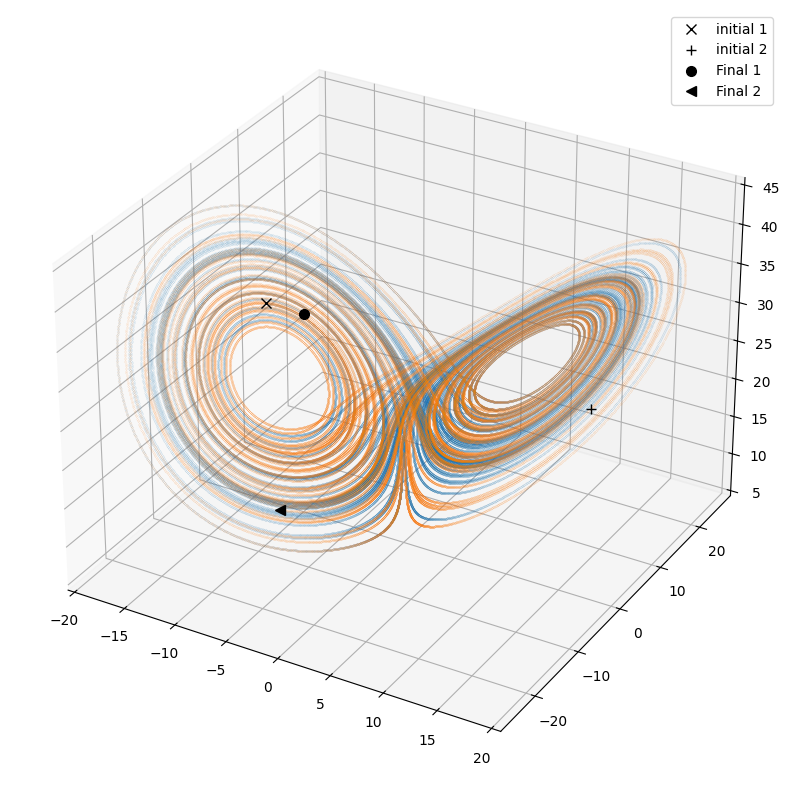

In [49]:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.plot(xtraj1[:,0], xtraj1[:,1], xtraj1[:,2], '.', ms=0.1)
ax.plot(xtraj2[:,0], xtraj2[:,1], xtraj2[:,2], '.', ms=0.1)

ax.plot(xtraj1[0,0], xtraj1[0,1], xtraj1[0,2], 'xk', ms=7, label="initial 1")
ax.plot(xtraj2[0,0], xtraj2[0,1], xtraj2[0,2], '+k', ms=7, label="initial 2")

ax.plot(xtraj1[-1,0], xtraj1[-1,1], xtraj1[-1,2], 'ok', ms=7, label="Final 1")
ax.plot(xtraj2[-1,0], xtraj2[-1,1], xtraj2[-1,2], '<k', ms=7, label="Final 2")

plt.legend()
plt.tight_layout()

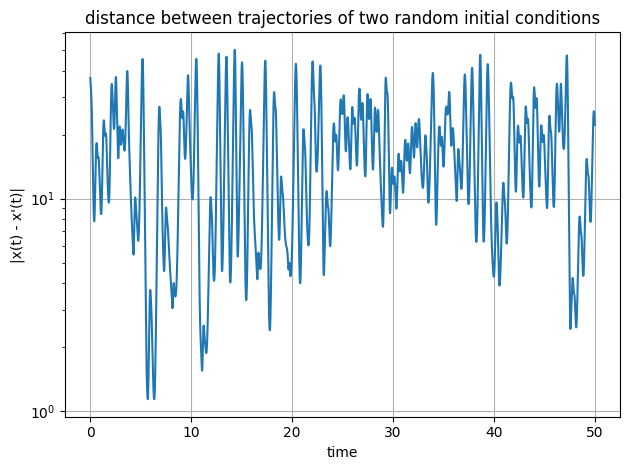

In [51]:
plt.semilogy(t, trajdiff)
plt.xlabel('time')
plt.ylabel("|x(t) - x'(t)|")
plt.title("distance between trajectories of two random initial conditions")
plt.grid()
plt.tight_layout()